In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

In [2]:
centers = [[1,1,1],[5,5,5],[10,10,10]]

In [3]:
X, y = make_blobs(n_samples = 20, centers = centers, cluster_std = 1.5)

In [4]:
print(X,y)

[[ 1.19579346  3.23852724  2.02953271]
 [ 5.46562251  5.17964343  6.3600533 ]
 [ 3.21840405  5.64722693  5.40791292]
 [ 1.88830622 -0.04989778 -0.89752263]
 [ 5.05771002  5.53161705  4.39505241]
 [ 4.73351905  2.26003894  4.6804673 ]
 [11.6940737  11.45137097 12.76857125]
 [ 9.00494203 11.25795111 11.31439909]
 [ 2.08526141  1.37842892  2.79584712]
 [ 3.93363292  5.56991939  4.18911791]
 [ 3.23892428  6.20524175  2.59291954]
 [-0.73560309  2.4461093   2.63368713]
 [ 7.8117539   1.8203501   4.25779318]
 [ 7.75505073 11.41315689  9.60985423]
 [ 2.60628867  2.55401748  0.08521859]
 [11.0137797   9.14983    11.89091271]
 [ 9.55992369  7.46732531 12.79983121]
 [ 7.32661134  9.05053081 13.22985132]
 [ 1.69409498  1.13462851  2.39754065]
 [ 2.36130871  1.9569692  -0.0236694 ]] [0 1 1 0 1 1 2 2 0 1 1 0 1 2 0 2 2 2 0 0]


In [5]:
ms = MeanShift(bandwidth=1)        

In [6]:
ms

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [7]:

ms.fit(X)
labels = ms.labels_
print(labels)
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)


[ 2  3  4  5  6  7  8  9  0 10 11 12 13 14  1 15 16 17  0  1]
[[ 1.8896782   1.25652872  2.59669389]
 [ 2.48379869  2.25549334  0.0307746 ]
 [ 1.19579346  3.23852724  2.02953271]
 [ 5.46562251  5.17964343  6.3600533 ]
 [ 3.21840405  5.64722693  5.40791292]
 [ 1.88830622 -0.04989778 -0.89752263]
 [ 5.05771002  5.53161705  4.39505241]
 [ 4.73351905  2.26003894  4.6804673 ]
 [11.6940737  11.45137097 12.76857125]
 [ 9.00494203 11.25795111 11.31439909]
 [ 3.93363292  5.56991939  4.18911791]
 [ 3.23892428  6.20524175  2.59291954]
 [-0.73560309  2.4461093   2.63368713]
 [ 7.8117539   1.8203501   4.25779318]
 [ 7.75505073 11.41315689  9.60985423]
 [11.0137797   9.14983    11.89091271]
 [ 9.55992369  7.46732531 12.79983121]
 [ 7.32661134  9.05053081 13.22985132]]
Number of estimated clusters: 18


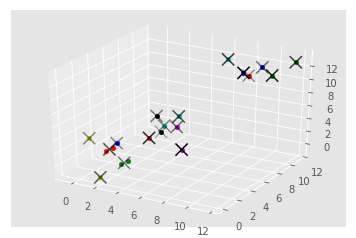

In [8]:

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()
#ax.show()

WITH TITANIC DATASET

In [9]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values
    print(columns)
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

/home/mihir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


['pclass' 'survived' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare' 'cabin'
 'embarked' 'boat' 'home.dest']


MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [10]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
print(labels)
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[0 1 1 ... 0 0 0]
[[ 0.39057351 -0.24828738 -0.12165834 -0.22386695 -0.27421671 -0.36155121
  -0.39949246  0.20318778 -0.33999729]
 [-1.54609786  0.30074929  1.954745    0.48128777  3.60016958  4.43513362
   2.83574054 -0.75170849 -0.11687269]
 [-1.54609786 -0.04733278  1.08748559 -0.47908676  0.32550889  9.26124543
   2.69503513 -1.85731121  2.45288684]
 [ 0.84191642  0.30074929 -1.35790158  0.48128777  9.95686385  0.70136971
  -0.45676585  0.35389422 -0.6308246 ]
 [-1.54609786  1.34499549  0.63252984 -0.47908676 -0.4449995   9.26124543
  -0.45676585 -1.85731121  2.45288684]]
Number of estimated clusters: 5


In [11]:
original_df['cluster_group']=np.nan


In [12]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

/home/mihir/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.37209302325581395, 1: 0.6304347826086957, 2: 1.0, 3: 0.1, 4: 1.0}


In [14]:
print(original_df[ (original_df['cluster_group']==0) ])

      pclass  survived                                              name  \
0          1         1                     Allen, Miss. Elisabeth Walton   
5          1         1                               Anderson, Mr. Harry   
6          1         1                 Andrews, Miss. Kornelia Theodosia   
7          1         0                            Andrews, Mr. Thomas Jr   
8          1         1     Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                           Artagaveytia, Mr. Ramon   
12         1         1                     Aubart, Mme. Leontine Pauline   
13         1         1                      Barber, Miss. Ellen "Nellie"   
14         1         1              Barkworth, Mr. Algernon Henry Wilson   
15         1         0                               Baumann, Mr. John D   
18         1         1                             Bazzani, Miss. Albina   
19         1         0                              Beattie, Mr. Thomson   
20         1